# Importar librerias

In [202]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set()

# Carga de datos

In [203]:
df = pd.read_csv("../Data/Dry_Bean.csv")
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [204]:
df["Class"].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

# Drop duplicates

In [205]:
df.drop_duplicates(inplace=True)

# Manejo valores nulos

In [206]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

# Undersampliing

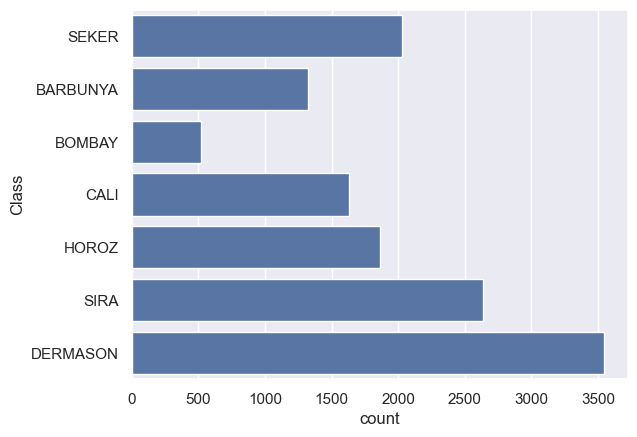

In [207]:
sns.countplot(df.Class);


Para que sea  unbuen modelo, deberia tener la misma canitdad de ejemplos de cada clase, por eso como la minima tiene cerca de 500 datos, bajaremos todos a la minima

In [208]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(random_state=42)



In [209]:
X = df.drop("Class", axis =1)
y = df.Class


In [210]:
X_over , y_over = undersample.fit_resample(X,y)

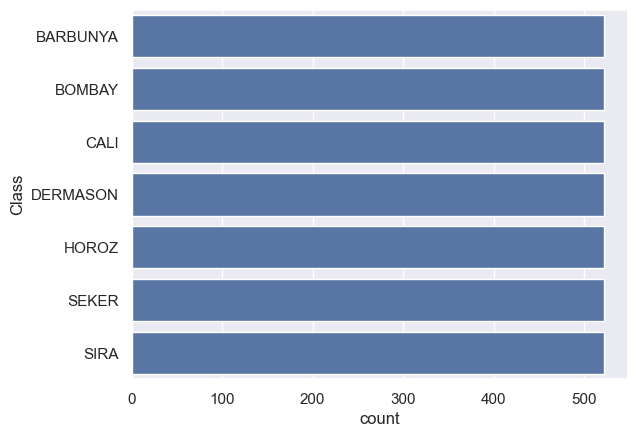

In [211]:
sns.countplot(y_over);

In [212]:
print(df.shape)
print(X_over.shape)

(13543, 17)
(3654, 16)


# Conversión a numéricos

In [213]:
list(np.unique(y_over))

['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']

In [214]:
y_over.replace(['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'],[1,2,3,4,5,6,7], inplace = True)

/var/folders/52/bzfm61sj2znfqg12w34hpj6c0000gp/T/ipykernel_29880/3082522694.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_over.replace(['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'],[1,2,3,4,5,6,7], inplace = True)


In [215]:
list(np.unique(y_over))

[1, 2, 3, 4, 5, 6, 7]

# EDA

## Correlations

In [216]:
X_over

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
2754,70776,1060.894,386.619944,234.100208,1.651515,0.795842,71978,300.191276,0.775763,0.983300,0.790227,0.776451,0.005463,0.001225,0.602875,0.995658
2506,66370,1004.139,339.287072,249.883085,1.357783,0.676443,67637,290.697280,0.720536,0.981268,0.827169,0.856789,0.005112,0.001699,0.734087,0.996731
2267,60736,985.501,342.445302,226.741775,1.510288,0.749393,61680,278.085377,0.789353,0.984695,0.785854,0.812058,0.005638,0.001512,0.659438,0.995941
2449,65219,1011.110,353.650546,235.308999,1.502920,0.746512,66672,288.165594,0.719436,0.978207,0.801654,0.814831,0.005423,0.001475,0.663950,0.997864
2076,51332,889.637,330.822804,198.618899,1.665616,0.799716,52283,255.651975,0.751688,0.981811,0.815028,0.772776,0.006445,0.001418,0.597183,0.994678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8692,44358,785.631,288.303275,196.970714,1.463686,0.730225,44898,237.651761,0.791937,0.987973,0.903118,0.824312,0.006499,0.001851,0.679490,0.994560
7578,37641,742.538,284.313737,169.740814,1.674987,0.802227,38112,218.920099,0.744187,0.987642,0.857894,0.769995,0.007553,0.001638,0.592892,0.993087
7924,40668,747.000,271.731569,191.687622,1.417575,0.708780,41257,227.552424,0.712162,0.985724,0.915844,0.837416,0.006682,0.002027,0.701266,0.994097
9972,53233,893.511,329.969126,206.375684,1.598876,0.780273,54022,260.342775,0.689154,0.985395,0.837898,0.788991,0.006199,0.001482,0.622507,0.995312


In [217]:
#df_dea = np.copy(X_over)
#df_dea["Class"] = y_over

In [218]:
plt.figure(figsize=(15,10))
#sns.heatmap(df_dea.corr(), annot=True);

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

In [219]:
X_over.drop(["ConvexArea", "EquivDiameter"], axis=1, inplace=True)

# Visulización de datos

In [220]:
#sns.pairplot(df_dea, hue="Class")

# Split y escalamiento de datos

In [221]:
y_over

2754    1
2506    1
2267    1
2449    1
2076    1
       ..
8692    7
7578    7
7924    7
9972    7
9720    7
Name: Class, Length: 3654, dtype: int64

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, random_state=42, shuffle=True, test_size=0.2)

In [223]:
st_x = StandardScaler()
X_train = st_x.fit_transform(X_train)
X_test = st_x.transform(X_test)


# modelo multiclase

In [224]:
def logistic_model(C_,solver_,multiclass_):
    logistic_regression_model  = LogisticRegression(random_state=42, solver=solver_, multi_class=multiclass_, n_jobs=-1, C=C_)
    return logistic_regression_model


In [225]:
model = logistic_model(1,'saga','multinomial')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

[[119   0   5   0   1   0   3]
 [  0  98   0   0   0   0   0]
 [  5   0  97   0   0   0   1]
 [  0   0   0  90   0   5  10]
 [  0   0   4   1  91   0   0]
 [  3   0   0   0   0  84   4]
 [  0   0   1   6   6   0  97]]
0.9247606019151847


/Users/Sebastian/Desktop/Cursos Platzi/RegresionLogistica_Python/env_data/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [226]:
multiclass = ['ovr','multinomial']
solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
scores = []
params = []
for i in multiclass:
    for j in solcer_list:
        try:
            model = logistic_model(1,j,i)
            model.fit(X_train, y_train)
            predictions = model.predict(X_test)
            params.append(i + "-" + j)
            accuracy = accuracy_score(y_test, predictions)
            scores.append(accuracy)
        except:
            None


/Users/Sebastian/Desktop/Cursos Platzi/RegresionLogistica_Python/env_data/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Users/Sebastian/Desktop/Cursos Platzi/RegresionLogistica_Python/env_data/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Sebastian/Desktop/Cursos Platzi/RegresionLogistica_Python/env_data/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Sebastian/Desktop/Cursos Platzi/RegresionLogistica_Python/env_data/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/Sebastian/Des

# Evaluar resultados

In [227]:
params

['ovr-liblinear',
 'ovr-newton-cg',
 'ovr-lbfgs',
 'ovr-sag',
 'ovr-saga',
 'multinomial-newton-cg',
 'multinomial-lbfgs',
 'multinomial-sag',
 'multinomial-saga']

Text(0.5, 1.0, 'Beans Accuracy')

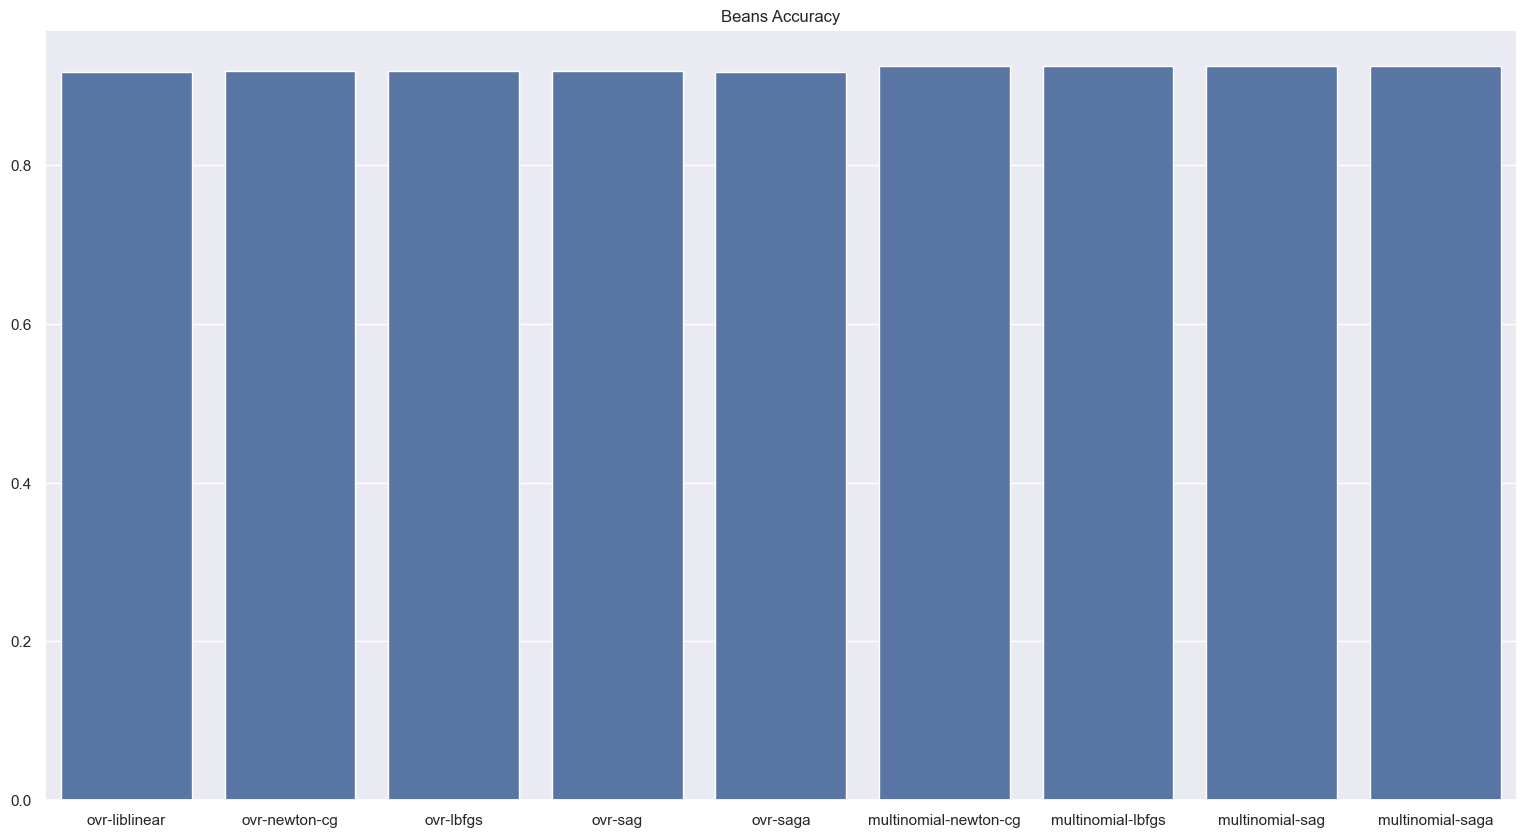

In [228]:
fig = plt.figure(figsize=(19,10))
sns.barplot(x=params, y=scores).set_title("Beans Accuracy")

In [229]:
model = logistic_model(1,'newton-cg','multinomial')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

[[119   0   5   0   1   0   3]
 [  0  98   0   0   0   0   0]
 [  5   0  97   0   0   0   1]
 [  0   0   0  90   0   5  10]
 [  0   0   4   1  91   0   0]
 [  3   0   0   0   0  84   4]
 [  0   0   1   6   6   0  97]]
0.9247606019151847


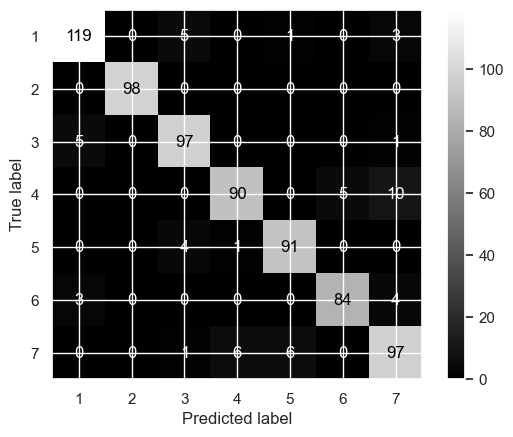

In [230]:
cm = confusion_matrix(y_test, predictions, labels=model.classes_) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='gray')
plt.show()